In [8]:
# This project notebook is for CSC 2400 - Design of Algorithms
# It addresses the Closest Pair of Points problem using two algorithms:
# 1. Divide and Conquer, 2. KD-Tree approach
# Closest Pair of Points Project
## CSC 2400 - Design of Algorithms
### Authors: Mia Guzman and Daniel Selvidge
##This notebook implements and compares the Divide and Conquer and KD-Tree approaches to solve the Closest Pair of Points problem.

In [9]:
# Importing essential libraries for numerical operations, plotting, nearest neighbor search, and timing
# - numpy: efficient array and mathematical operations
# - matplotlib.pyplot: for visualizing point data and results
# - KDTree from sklearn: for fast spatial queries
# - time: for measuring algorithm runtime
# - combinations: to evaluate brute-force pairs
# - pandas: potentially for data inspection or tabular output
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import time
from itertools import combinations
import pandas as pd

In [10]:
# Load three datasets representing different point distributions
# a3.txt: general dataset
# spiral.txt: a structured spiral pattern
# Aggregation.txt: aggregation of clusters
# Only the first two columns are used for spiral and aggregation (likely x and y coordinates)
# Load datasets
a3 = np.loadtxt("Downloads/archive/a3.txt")
spiral = np.loadtxt("Downloads/archive/spiral.txt", usecols=(0, 1))
aggregation = np.loadtxt("Downloads/archive/Aggregation.txt", usecols=(0, 1))

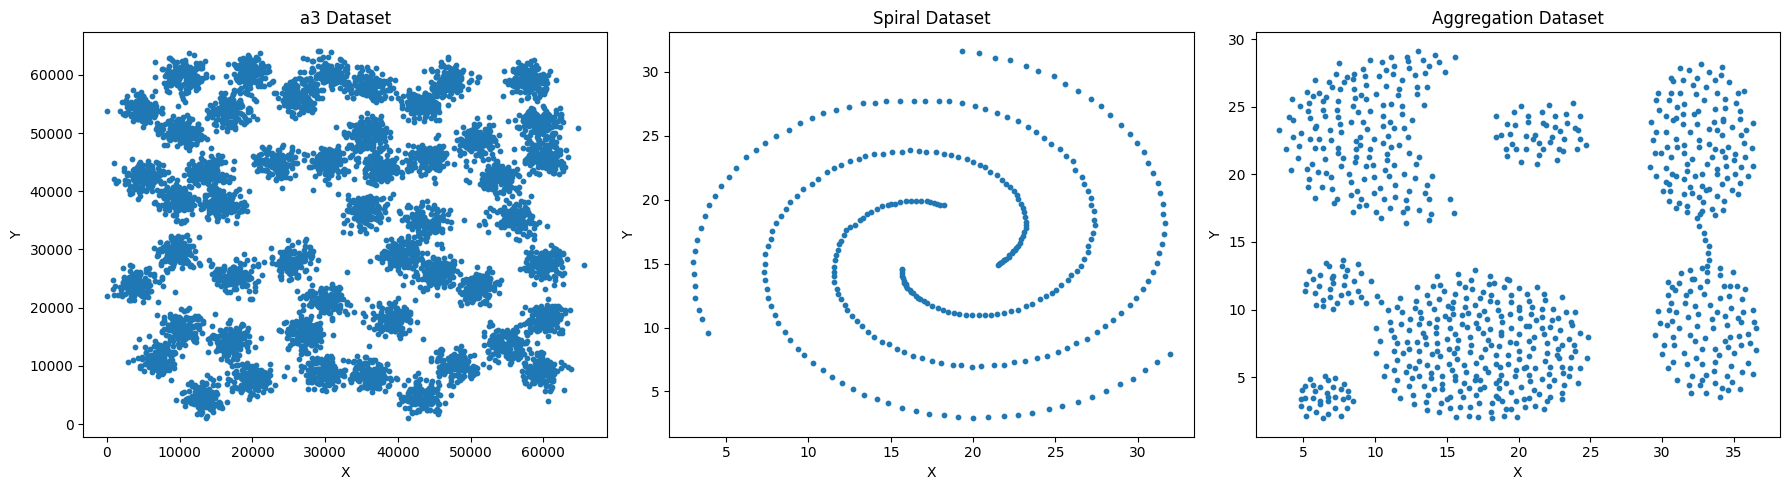

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(a3[:, 0], a3[:, 1], s=10)
axs[0].set_title('a3 Dataset')
axs[1].scatter(spiral[:, 0], spiral[:, 1], s=10)
axs[1].set_title('Spiral Dataset')
axs[2].scatter(aggregation[:, 0], aggregation[:, 1], s=10)
axs[2].set_title('Aggregation Dataset')
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

In [13]:
## Helper Function: Generate Random Points
def generate_points(n, dim=2):
    return np.random.rand(n, dim)

In [15]:
## Brute Force Method (for small n)
def brute_force(points):
    min_dist = float('inf')
    pair = None
    for p1, p2 in combinations(points, 2):
        dist = np.linalg.norm(p1 - p2)
        if dist < min_dist:
            min_dist = dist
            pair = (p1, p2)
    return min_dist, pair

In [17]:
## KD-Tree Method
def kd_tree_closest(points):
    tree = KDTree(points)
    dists, indices = tree.query(points, k=2)
    min_idx = np.argmin(dists[:,1])
    return dists[min_idx,1], (points[min_idx], points[indices[min_idx,1]])

In [19]:
## Divide and Conquer Method
# Wrapper function for the Divide and Conquer closest pair algorithm.
# It sorts the points by x and y coordinates and then calls the recursive function.
# This method answers the question: How efficient is Divide and Conquer for this problem?
def closest_pair_dc(P):
    def dist(p1, p2):
        return np.linalg.norm(p1 - p2)

    def recursive(Px, Py):
        if len(Px) <= 3:
            return brute_force(Px)
        
        mid = len(Px) // 2
        Qx = Px[:mid]
        Rx = Px[mid:]
        midpoint = Px[mid][0]

        Qy = list(filter(lambda x: x[0] <= midpoint, Py))
        Ry = list(filter(lambda x: x[0] > midpoint, Py))

        d1, pair1 = recursive(Qx, Qy)
        d2, pair2 = recursive(Rx, Ry)

        d = min(d1, d2)
        min_pair = pair1 if d1 < d2 else pair2

        in_strip = [p for p in Py if abs(p[0] - midpoint) < d]
        for i in range(len(in_strip)):
            for j in range(i+1, min(i+7, len(in_strip))):
                if dist(in_strip[i], in_strip[j]) < d:
                    d = dist(in_strip[i], in_strip[j])
                    min_pair = (in_strip[i], in_strip[j])
        return d, min_pair

    Px = sorted(P, key=lambda x: x[0])
    Py = sorted(P, key=lambda x: x[1])
    return recursive(Px, Py)

In [21]:
## Run Experiments and Compare Methods
# Wrapper function for the Divide and Conquer closest pair algorithm.
# It sorts the points by x and y coordinates and then calls the recursive function.
# This method answers the question: How efficient is Divide and Conquer for this problem?
sizes = [4, 16, 32, 64, 128, 256]
results = []

for n in sizes:
    points = generate_points(n)

    start = time.time()
    d_dc, _ = closest_pair_dc(points)
    dc_time = time.time() - start

    start = time.time()
    d_kd, _ = kd_tree_closest(points)
    kd_time = time.time() - start

    results.append((n, dc_time, kd_time))

df = pd.DataFrame(results, columns=['n', 'Divide&Conquer Time', 'KDTree Time'])
df

,n,Divide&Conquer Time,KDTree Time
0,4,0.000263,0.001178
1,16,0.000341,0.000238
2,32,0.001153,0.000330
3,64,0.003726,0.000735
4,128,0.005707,0.000992
5,256,0.011299,0.001011


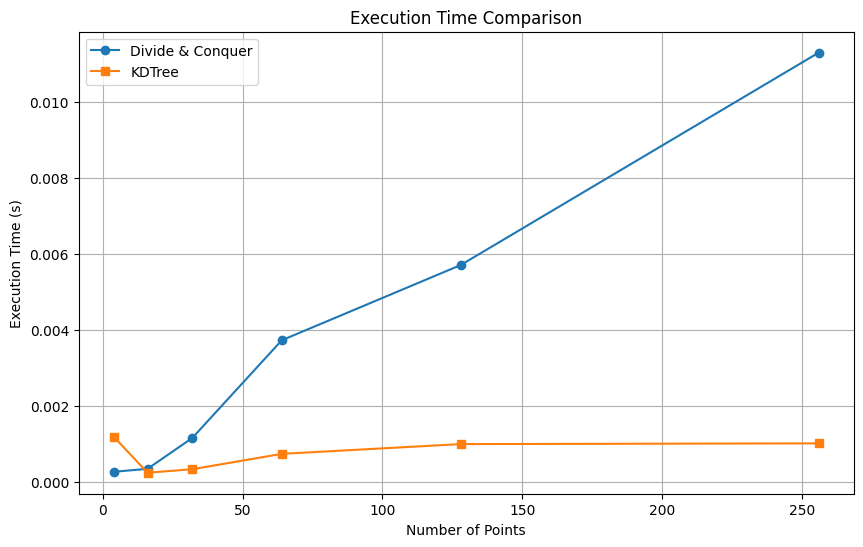

In [23]:
## Plot the Results
plt.figure(figsize=(10,6))
plt.plot(df['n'], df['Divide&Conquer Time'], marker='o', label='Divide & Conquer')
plt.plot(df['n'], df['KDTree Time'], marker='s', label='KDTree')
plt.xlabel('Number of Points')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Wrapper function for the Divide and Conquer closest pair algorithm.
# It sorts the points by x and y coordinates and then calls the recursive function.
# This method answers the question: How efficient is Divide and Conquer for this problem?
datasets = {
    'a3': np.loadtxt('Downloads/archive/a3.txt'),
    'spiral': np.loadtxt('Downloads/archive/spiral.txt', usecols=(0, 1)),
    'aggregation': np.loadtxt('Downloads/archive/Aggregation.txt', usecols=(0, 1))
}
results_real = []
for name, data in datasets.items():
    start = time.time()
    d_dc, _ = closest_pair_dc(data)
    dc_time = time.time() - start
    start = time.time()
    d_kd, _ = kd_tree_closest(data)
    kd_time = time.time() - start
    results_real.append((name, d_dc, dc_time, d_kd, kd_time))
df_real = pd.DataFrame(results_real, columns=['Dataset', 'DC Distance', 'DC Time', 'KD Distance', 'KD Time'])
df_real

,Dataset,DC Distance,DC Time,KD Distance,KD Time
0,a3,3.162278,0.185013,3.162278,0.005896
1,spiral,0.070711,0.003967,0.070711,0.000282
2,aggregation,0.111803,0.016816,0.111803,0.000495
